In [118]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import torch
from src.value import Value
from src.graph import draw_dot
from src.neural_net import Neuron, Layer, MLP

In [106]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

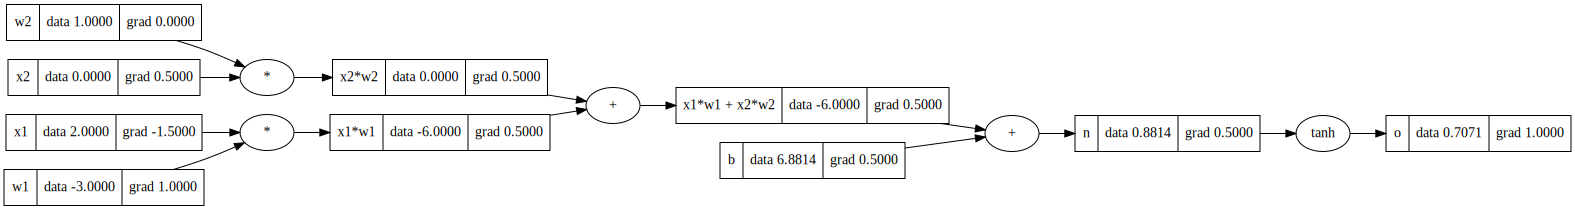

In [107]:
draw_dot(o)

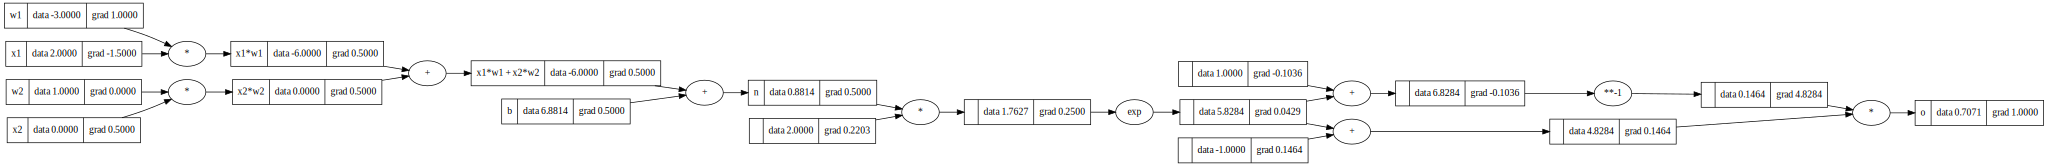

In [108]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
e = (2 * n).exp()
o = (e - 1) / (e + 1); o.label = 'o'
o.backward()
draw_dot(o)

In [109]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)


print(o.data.item()) # just returns float
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [110]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data = -0.1149831949085454)

In [111]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5], 
    [0.5, 1.0, 1.0], 
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]


In [116]:
n.train(xs, ys, 50)

0 0.06596971132670573
1 0.06497923789062023
2 0.06401666569678965
3 0.06308083339303702
4 0.062170643674206806
5 0.06128505889191839
6 0.06042309702300526
7 0.05958382796272746
8 0.05876637011247892
9 0.05796988723490052
10 0.05719358555214079
11 0.05643671106549278
12 0.05569854707684735
13 0.05497841189436224
14 0.05427565670648399
15 0.05358966361001033
16 0.05291984377926014
17 0.05226563576464684
18 0.051626503910057034
19 0.05100193687941577
20 0.05039144628370644
21 0.049794565400504504
22 0.04921084797879759
23 0.04863986712250257
24 0.04808121424667254
25 0.047534498100903086
26 0.046999343854919766
27 0.04647539224175468
28 0.04596229875430378
29 0.04545973289140772
30 0.04496737744991253
31 0.044484927859458186
32 0.04401209155700142
33 0.04354858739831844
34 0.043094145103951514
35 0.04264850473725729
36 0.042211416212400744
37 0.041782638830298466
38 0.04136194084066925
39 0.04094909902848708
40 0.04054389832325761
41 0.04014613142965589
42 0.03975559847816991
43 0.0393721

In [121]:
ypred = [n(x) for x in xs]
ypred

[Value(data = 0.9052238374992787),
 Value(data = -0.892264671389669),
 Value(data = -0.8980030173500546),
 Value(data = 0.9233372968247109)]